In [66]:
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

from PIL import Image

from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time



In [68]:
china = load_sample_image("flower.jpg")
china.shape

(427, 640, 3)

In [69]:
# google = Image.open("google.png")
# print(np.asarray(google).shape)
# google = np.asarray(google)[:, :, :-1]
# print(np.asarray(google).shape)

In [70]:
# hollow = Image.open("Hollow_-_Logotipo-03.png")
# hollow = np.asarray(hollow)[:, :, :-1]

In [71]:
X = china.reshape(-1, 3)
# X = google.reshape(-1, 3)
# X = hollow.reshape(-1, 3)

In [72]:
X.min(), X.mean(), X.max()

(0, 61.90442159445745, 255)

In [73]:
X = X.astype("float32") / 255
X.min(), X.mean(), X.max()

(0.0, 0.24276242, 1.0)

In [74]:
kmeans = KMeans(n_clusters=5)
predictions = kmeans.fit_predict(X)
centers = kmeans.cluster_centers_


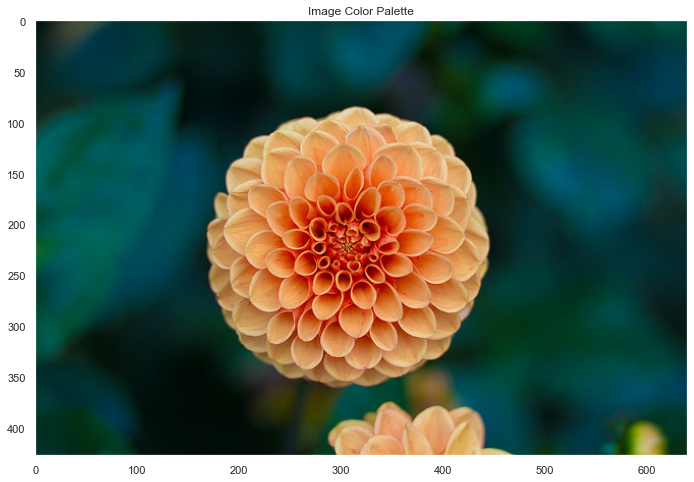

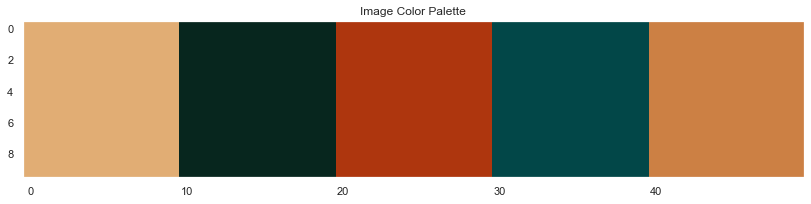

In [75]:
plt.figure(figsize=(14,8))
plt.imshow(china)
plt.title("Image Color Palette")
plt.grid()
fname = r"..\presentation_material\kmeans_presentation\flower\flower.png"
# fname = r".\presentation_material\kmeans_presentation\china\china.png"
plt.savefig(fname, dpi=600)

plt.figure(figsize=(14,8))
plt.imshow(centers[np.concatenate([[i] * 100 for i in range(len(centers))]).reshape((-1,10)).T])
plt.title("Image Color Palette")
plt.grid()
fname = r"..\presentation_material\kmeans_presentation\flower\palette.png"
# fname = r".\presentation_material\kmeans_presentation\china\palette.png"

# test = centers[np.concatenate([[i] * 100 for i in range(len(centers))]).reshape((-1,20)).T]
# test[:, :, :] *= 255 * np.ones((test.shape[0], test.shape[1], test.shape[2]))

In [61]:
rgb = centers*  255
rgb = rgb.astype(np.int64)
rgb



array([[231, 239, 248],
       [ 94,  84,  58],
       [154, 142, 120],
       [ 32,  28,  19],
       [193, 206, 217]], dtype=int64)

Output paleta como .txt RGB para atualizar no website

In [62]:
names = ["primary", "secondary"]
def generate_rgb_text(filename, names, palette):
    if len(names) != palette.shape[0]:
        raise ValueError
    with open(filename, "w") as file:
        for i, name in enumerate(names):
            color = name + " rgb("
            color += str(palette[i, :])
            color += ") \n"
            file.write(color)

generate_rgb_text("rgbTest.txt", names, rgb[:2, :])




Fazer visualização para k-clusters usando HSV

In [63]:
import colorsys 

def convert_rgb_to_hsv(rgb_palette):
    hsv = np.zeros(rgb_palette.shape)
    for i in range(rgb_palette.shape[0]):
        hsv[i, :] = colorsys.rgb_to_hsv(rgb_palette[i, 0],
                                    rgb_palette[i, 1],
                                    rgb_palette[i, 2])
    return hsv

def convert_hsv_to_rgb(hsv_palette):
    rgb = np.zeros(hsv_palette.shape)
    for i in range(hsv_palette.shape[0]):
        rgb[i, :] = colorsys.hsv_to_rgb(hsv_palette[i, 0],
                                    hsv_palette[i, 1],
                                    hsv_palette[i, 2])
    return rgb

In [64]:
# converter imagem original para HSV
Xhsv = convert_rgb_to_hsv(X)
# manter apenas hue
Xhue = Xhsv[:, 0]

print(Xhue[:10])
    


[0.5877193  0.5877193  0.5877193  0.5877193  0.5877193  0.5877193
 0.5877193  0.5877193  0.58474576 0.58474576]


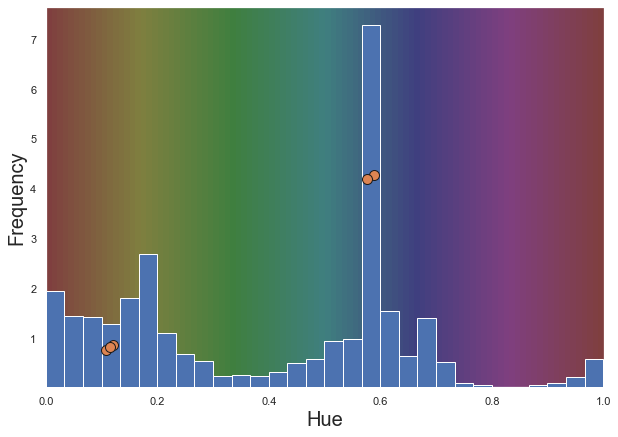

In [65]:
# fazer histograma dos valores de hue presentes na imagem
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot()
bins, etc, etc2 = ax.hist(Xhue, bins=30, zorder=4, density=True)

# converter centros dos kmeans para HSV
centersHsv = convert_rgb_to_hsv(rgb)
# manter apenas Hue e comparar no histograma
centersHue = centersHsv[:, 0]
ax.plot(centersHue, np.max(bins)*centersHue,
        ls='None', marker='o', ms=10.0, mec='k', zorder=5)

# mapear Hue no fundo
hue_colormap = np.zeros((100, 100, 3))
hue_colormap[:, :, 1:] = 0.5
hue_colormap[:, :, 0] = np.linspace(0, 1, 100)
test = hue_colormap.reshape(100*100, 3)
rgb_colormap = convert_hsv_to_rgb(hue_colormap.reshape(100*100, 3))
figRanges = [0, 1, np.min(bins), 1.05*np.max(bins)]
ax.imshow(rgb_colormap.reshape(100, 100, 3), extent=figRanges, zorder=1, aspect="auto")
ax.set_xlabel("Hue", fontsize=20)
ax.set_ylabel("Frequency", fontsize=20)

# fname = r"..\presentation_material\kmeans_presentation\flower\histogram.png"
fname = r"..\presentation_material\kmeans_presentation\china\histogram.png"
plt.savefig(fname, dpi=600)

[[0.03071366 0.15276031 0.11801315]
 [0.80158114 0.5016886  0.26460376]
 [0.00847842 0.280462   0.28582776]
 [0.88328934 0.67811525 0.4546637 ]
 [0.6847166  0.21011633 0.05421257]]


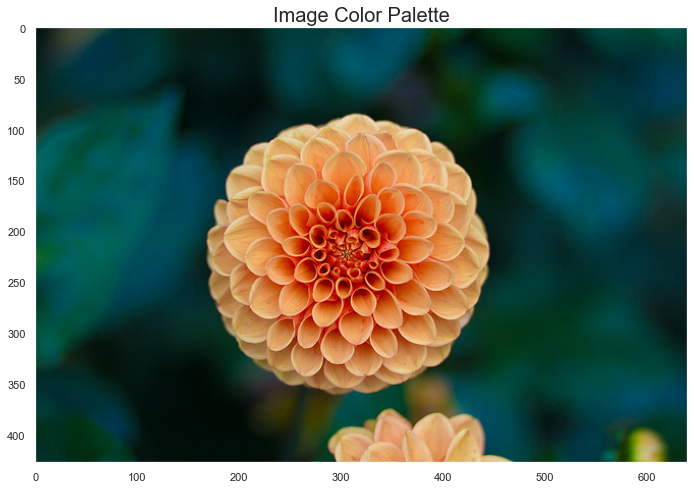

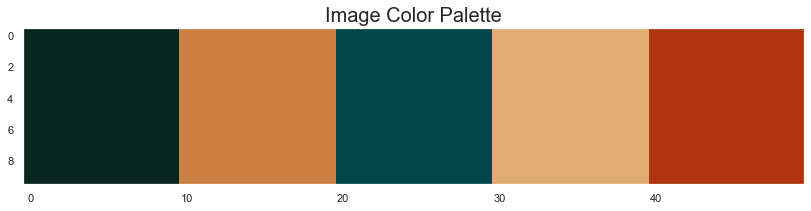

In [52]:
plt.figure(figsize=(14,8))
plt.imshow(china)
plt.title("Image Color Palette", fontsize=20)
plt.grid()

plt.figure(figsize=(14,8))
plt.imshow(centers[np.concatenate([[i] * 100 for i in range(len(centers))]).reshape((-1,10)).T])
plt.title("Image Color Palette", fontsize=20)
plt.grid()

print(centers)